In [21]:
from sklearn.ensemble import RandomForestClassifier

# Load pandas
import pandas as pd
import matplotlib.pyplot as plt
# Load numpy
import numpy as np

import os
import pickle
import sys
from sklearn.decomposition import PCA
from scipy.stats.mstats import zscore
%matplotlib inline

In [72]:
# load in data.
os.chdir('/mnt/c/Users/bassp/Downloads/Python Work/bat_data/')
y=pd.read_pickle('calltype.pkl')
df = pd.read_pickle('ldatable.pkl')

In [11]:
fulldf=pd.read_pickle('fulldf.pkl')

In [12]:
fulldf.columns

Index([u'F1', u'F2', u'F3', u'cvfund', u'entS', u'entT', u'f0', u'f0_2',
       u'fund', u'kurtS', u'kurtT', u'maxAmp', u'maxfund', u'meanS', u'meanT',
       u'minfund', u'mps', u'name', u'q1', u'q2', u'q3', u'rms', u'sal',
       u'shift', u'skewS', u'skewT', u'spectro', u'stdS', u'stdT', u'type'],
      dtype='object')

In [16]:
mps_df = pd.read_pickle('mpsvals.pkl')
spec_df = pd.read_pickle('specvals.pkl')

In [17]:
# run PC on mps and df !
mps_vals=mps_df.replace([np.inf, -np.inf], np.nan).fillna(0).astype('float').abs().as_matrix()
spec_vals = spec_df.replace([np.inf, -np.inf], np.nan).fillna(0).astype('float').abs().as_matrix()

/home/ammanas/anaconda_3/envs/geralt/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/ammanas/anaconda_3/envs/geralt/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'component 2')

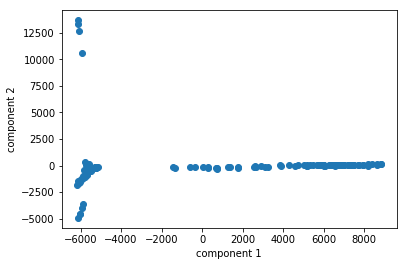

In [22]:
pca = PCA(n_components=150)

Xr2 = pca.fit_transform(mps_vals)

#color= ['red' if l == 'short' else 'green' if l == 'trill' else 'blue' for l in y]
plt.scatter(Xr2[:, 0], Xr2[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')




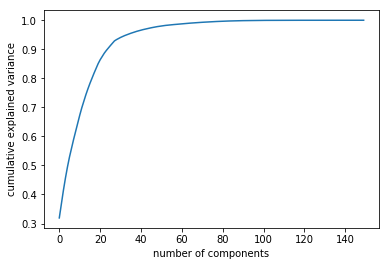

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [25]:
# take first 20 components of MPS and use them as parameters for RFC.
mps_explained = Xr2[0:30,:]    
print(mps_explained)

[[-5.33098834e+03 -1.88610678e+02 -2.74910135e+02 ...  5.03859635e-04
   5.85356642e-04  4.71494806e-04]
 [-6.08066218e+03 -1.66585547e+03 -4.30481396e+03 ...  3.90983511e-03
  -3.81085677e-03  9.40210948e-03]
 [-5.70277100e+03 -7.70835781e+02 -1.78114776e+03 ... -1.85162648e-02
   1.28966123e-02 -5.00438955e-02]
 ...
 [-5.91489233e+03  1.05820188e+04  2.71647583e+03 ...  6.52695550e-02
   7.40627160e-02 -2.09126246e-02]
 [-5.91665149e+02 -1.80697405e+02 -3.13205417e+02 ...  3.30352248e+00
   2.97133553e-02  5.06246664e-01]
 [-5.80546166e+03 -4.59899996e+02 -8.22197329e+02 ...  2.11763351e-03
   3.71629386e-04  1.77935919e-03]]


Text(0,0.5,'component 2')

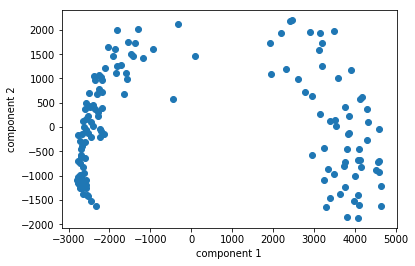

In [29]:
# run the same for spectrogram.
pca = PCA(n_components=140)

Xr1 = pca.fit_transform(spec_vals)

#color= ['red' if l == 'short' else 'green' if l == 'trill' else 'blue' for l in y]
plt.scatter(Xr1[:, 0], Xr1[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')



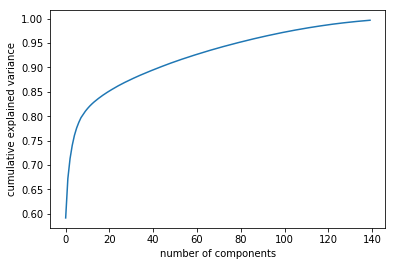

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [58]:
# use 60 spectral components.
#spec_explained = Xr1[0:60,:]
spec_explained.shape
#mps_explained.shape
#sdf.shape

(60, 140)

In [54]:
spec_name =[]
for mx in range(0,len(spec_explained)):
    spec_name.append('spec'+str(mx))
mps_name =[]
for sx in range(0,len(mps_explained)):
    mps_name.append('mps'+str(sx))
spec_name


['spec0',
 'spec1',
 'spec2',
 'spec3',
 'spec4',
 'spec5',
 'spec6',
 'spec7',
 'spec8',
 'spec9',
 'spec10',
 'spec11',
 'spec12',
 'spec13',
 'spec14',
 'spec15',
 'spec16',
 'spec17',
 'spec18',
 'spec19',
 'spec20',
 'spec21',
 'spec22',
 'spec23',
 'spec24',
 'spec25',
 'spec26',
 'spec27',
 'spec28',
 'spec29',
 'spec30',
 'spec31',
 'spec32',
 'spec33',
 'spec34',
 'spec35',
 'spec36',
 'spec37',
 'spec38',
 'spec39',
 'spec40',
 'spec41',
 'spec42',
 'spec43',
 'spec44',
 'spec45',
 'spec46',
 'spec47',
 'spec48',
 'spec49',
 'spec50',
 'spec51',
 'spec52',
 'spec53',
 'spec54',
 'spec55',
 'spec56',
 'spec57',
 'spec58',
 'spec59']

In [59]:
sdf=pd.DataFrame(spec_explained.T)
mdf = pd.DataFrame(mps_explained.T)

sdf.columns=spec_name
mdf.columns=mps_name
sdf.to_pickle('sdf.pkl')
mdf.to_pickle('mdf.pkl')

In [62]:
#fulldf.drop(['spectro','mps','type','shift','name'], axis=1, inplace=True)
fulldf = fulldf.reset_index()
rfdf = pd.concat([fulldf,sdf,mdf],axis=1)

In [63]:
rfdf.head()

,index,F1,F2,F3,cvfund,entS,entT,f0,f0_2,fund,...,mps20,mps21,mps22,mps23,mps24,mps25,mps26,mps27,mps28,mps29
0,0,3688.541554,4774.463782,NaN,0.046106073599665266,0.8123508863251411,0.9825346391484916,[695.3436607747198],1378.054624,695.3436607747198,...,-5627.701087,-5503.012739,-5298.282547,-5401.134975,-5752.670480,-6113.858361,-5563.982891,-5914.892328,-591.665149,-5805.461664
1,1,3709.841309,4975.532236,NaN,0.22814173060081386,0.7910097814099437,0.9732295207426069,[758.4790311228726],1218.974605,758.4790311228726,...,-343.162562,-238.356483,-241.876263,-243.403245,-820.615264,-4925.824020,-309.163724,10582.018752,-180.697405,-459.899996
2,2,3828.444866,4995.811641,NaN,0.09217852362447186,0.8042922309640711,0.9735727955957987,[874.8327466627449],1103.977000,874.8327466627449,...,-602.173997,-409.115519,-401.953634,-421.529994,-1932.631873,11705.219935,-505.115298,2716.475826,-313.205417,-822.197329
3,3,4000.269905,4929.627145,NaN,0.4321398633606487,0.7909745119450291,0.9735044383698301,[856.8743417898147],1402.970771,856.8743417898147,...,30.585596,31.100758,13.272831,-132.666548,-3025.406313,-141.426509,25.440854,-118.029181,22.476137,121.369929
4,4,4195.312977,5065.690543,NaN,0.13570924753743213,0.763630286796733,0.970314172392224,[790.3466600191455],NaN,790.3466600191455,...,-1939.455043,-1336.983759,-1250.658854,-823.067986,1703.564884,2857.782572,-1515.832627,1712.132875,-1858.304050,-3548.549179


In [64]:
rfdf.columns

Index([u'index', u'F1', u'F2', u'F3', u'cvfund', u'entS', u'entT', u'f0',
       u'f0_2', u'fund',
       ...
       u'mps20', u'mps21', u'mps22', u'mps23', u'mps24', u'mps25', u'mps26',
       u'mps27', u'mps28', u'mps29'],
      dtype='object', length=116)

In [65]:
rfdf.to_pickle('mps_spec_pcadf.pkl')

## Now that I have dimensionalized my data, we can run better, more precise tests on the data.

## First, I will start with a random forest classifier using sklearn, found here https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [73]:
#RF_array = rfdf.replace([np.inf, -np.inf], np.nan).fillna(0).astype('float').abs().as_matrix()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(RF_array[0:152], y, test_size=0.15, random_state=0)  

/home/ammanas/anaconda_3/envs/geralt/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ammanas/anaconda_3/envs/geralt/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [82]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf
trained_model = random_forest_classifier(X_train, y_train)
print "Trained model :: ", trained_model
predictions = trained_model.predict(X_test)
print(predictions,y_test)
#for i in xrange(0, 2):
#    (list(y_test)[i], predictions[i])

Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
(array(['new', 'short', 'new', 'short', 'trill', 'short', 'new', 'new',
       'trill', 'new', 'short', 'trill', 'trill', 'short', 'trill',
       'trill', 'trill', 'new', 'trill', 'new', 'trill', 'new', 'trill'],
      dtype=object),     calltype
98       new
44     short
62       new
24     short
102    trill
37     short
83       new
7        new
113    trill
51       new
40       new
127    trill
133    trill
26     short
101    trill
149    trill
108    trill
54     short
109    trill
33     short
136    trill
61     short
128    trill)


/home/ammanas/anaconda_3/envs/geralt/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score(y_train, trained_model.predict(X_train))
accuracy_score(y_test, predictions)

0.8260869565217391